<a href="https://colab.research.google.com/github/GuilhermeDeAssis123/DataScience/blob/master/Projeto_Data_Science(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise sobre o naufrágio do Titanic** 
> Com certeza a maioria das pessoas já ouviram falar sobre o naufrágio mais conhecido da história, o naufrágio do Titanic, que em sua epóca era o maior e mais moderno navio existente. Apesar do seu poderio tecnológio o navio afundou após colidir com um iceberg, matando 1502 dos 2224 passageiros do navio


---


<center><img src = "https://aventurasnahistoria.uol.com.br/media/_versions/legacy/2018/04/11/titanic2-0349859403-2203948..capa_widelg.jpg"></center>


---

>Sem contar o fato de que no momento do naufrágio constatou-se que não haviam botes salva vidas o suficiente para todos os passageiros da embarcação. Podemos dizer que aqueles que sobreviveram tiveram muita sorte, mas pergunta certa é, **sera que alguns passageiros tiveram mais sorte que outros?**

##**1. Objetivo**

>Tendo isso em vista o objetivo dessa análise é averiguar qual era a chance de sobrevivencia dos passageiros do navio. Espera-se fazer isso através da verificação de **como as variáveis podem influênciar no resultado final**, ou seja, quais são os fatores determinantes para sobreviver nessa situação.
>Também é esperado a construção de um modelo que **dê a previsão de sobrevivência para um passageiro qualquer forcenido via** *input*.

---
##**2. Obtenção dos Dados**

> Os dados foram obtidos a partir da plataforma *Kaggle*, que é uma incentivadora do apremdizado de *machine learning*, e esse é um desafio proposto pela plataforma.
>Foram disponibilizados dois DataSet, sendo eles:
* DataSet de treino: Esse deve ser o conjunto de dados utilizado para o treinamento e construção do modelo de *machine learning*, responsável por dizer se o passageiro vai sobreviver ou não. Utilizado na análise dos dados
* DataSet de teste: Esse sera o conjunto de dados não é conhecido pelo modelo e será utilizado no final como parametro de acurácia.

In [0]:
# Importando bibliotecas.
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

# Permite mostrar todas as colunas.
pd.options.display.max_columns  = None

# Renderizar os gráficos no próprio notebook
%matplotlib inline

# Importando os DataSets necessários
df_treino = pd.read_csv('https://raw.githubusercontent.com/GuilhermeDeAssis123/DataScience/master/train.csv')
df_teste = pd.read_csv('https://raw.githubusercontent.com/GuilhermeDeAssis123/DataScience/master/test.csv')

### Q1. Qual o tamnho do nosso Dateset, quantas colunas(variàveis) e linhas(entradas) ele possui?
> Podemos observar que o DataSet possui 891 entradas(linhas) e 12 variáveis(colunas). 


In [4]:
# mostrando o tamanho do DataSet.
print("""Entrdas: {}
Variáveis: {}""".format(df_treino.shape[0],df_treino.shape[1]))

Entrdas: 891
Variáveis: 12


---
##3. Exploração dos Dados
> Essa é fase no qual análisamos o nosso DataSet com o propósito de melhorar sua qualidade retirando colunas ou linhas que estejam em branco, retirando outliers entre outros problemas que atrapalham ou distorcem a interpretção dos dados. Como se trata de um problema de classificação, ou seja, aprendizado supervisionado, a variável *survived* é definida como nossa variável alvo.
###Dicionário de Dados
>Nesta parte apresentação das variáveis e uma breve descrição.
* PassangerId - Número identificador do passsageiro
* Survived - Estado do passageiro
           1 = Vivo
           0 = Morto
* Pclass - Classe do navio a qual pertence
* Name - Nome do passageiro
* Sex -  Sexo do passageiro
* Age - Idade do passageiro
* SibSp - Quantidade de cônjuges ou irmãos a bordo
* Parch - Quantidade de pais e filhos a bordo
* Ticket - Número da passagem
* Fare - Preço da passagem
* Cabin - Número da Cabine
* Embarked -  Porto no qual o passageiro embarcou
        C = Cherbourg 
        Q = Queenstown
        S = Southampton

### Q1. Quais os Tipos de cada variável?
> Observe logo abaixo que temos **3 tipos** de variável sendo elas, inteiras, flutuantes e Strings:
* **5 inteiras**
* **2 flutuantes**
* **5 Strings**



In [6]:
# Mostra o tipo de cada variável
display(df_treino.dtypes)

# Mostra os 5 primeiros valores do DataSet
df_treino.head()

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q2. Qual a porcentagem de valores nulos por variável?

 * Podemos observar a cima que a **variável Cabin** possuir cerca de **77,1% dos dados como nulos**
 * Já com a **variável Age** temos uma porcentagem de **19,8% de dados nulos**
 * No caso da **variável Embarked** temos apenas **0.22% dos dados como nulos**
---
> Agora vamos análisar os histogramas de cada variável em busca de verificar alguns outliers.

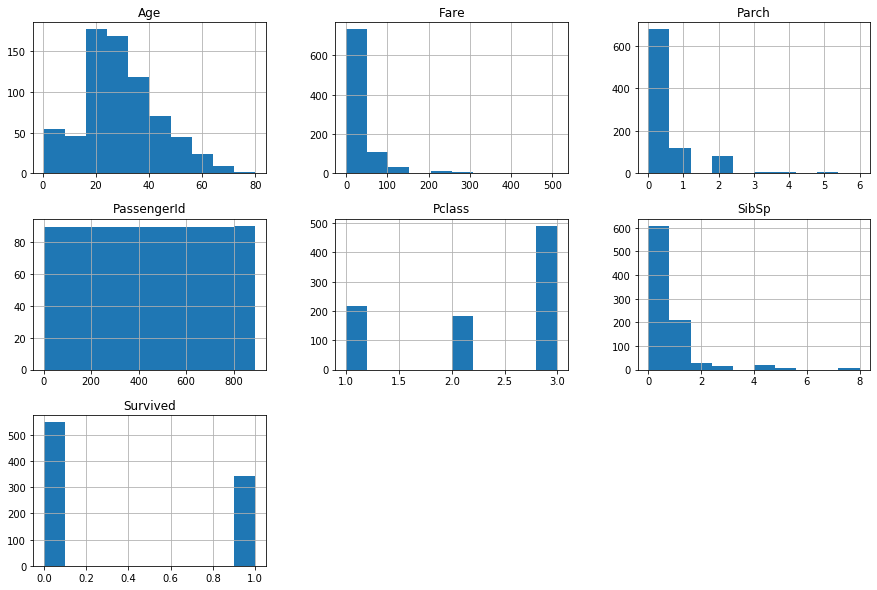

In [8]:
# plotando histogramas de todas as variáveis númericas

df_treino.hist(bins= 10, figsize=(15,10));

> Podemos ver que em um dos gráficos existe uma presença de outliers, observe o histograma da **variável fare**, sua **distribuição** esta estranha e com uma **aplitude muito grande** no eixo x. Vamos olhar as estatísticas e ver se a hipótese se confirma.

###Q3. Existem outliers?

In [9]:
# Usando o método describe() para mostrar na tela as estatísticas.
df_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> Como podemos observar na ultima coluna referente a **variável fare** podemos observar que 75% dos valores estão abaixo de 31, porem o **valor maximo passa de 500**, observa-se também que o desvio padrão representado na terceira linha esta maior do que a média. Vamos então para confirmar plotar isso em Boxplot para confirmar a hipostese.

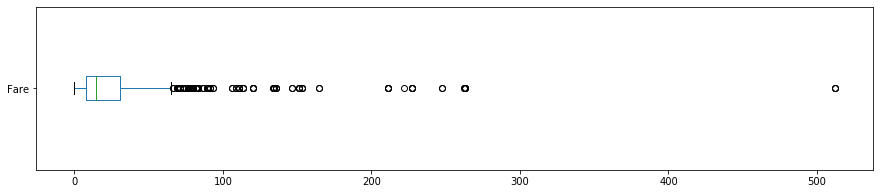

In [10]:
# Plotando um gráfico de caixa referente a variável fare.
df_treino.Fare.plot(kind = 'box', vert=False, figsize =(15,3))


In [11]:
print('Fare: Valores acima de 100:')
print('{} valores'.format(len(df_treino[df_treino.Fare > 100])))
print('Isso representa {:.2f}% de todos os valores da variável Fare'.format((len(df_treino[df_treino.Fare > 100])/df_treino.shape[0])*100))

Fare: Valores acima de 100:
53 valores
Isso representa 5.95% de todos os valores da variável Fare


>Existem 53 valores acima de 100 que representam apenas 5,95% dos dados, esses valores estão causando uma distorção do que realmente de fato acontece. Mas vamos corta-los, pois nesse caso não irá interferir no resultado final.

### Q4. Quais as chances de cada grupo sobreviver?

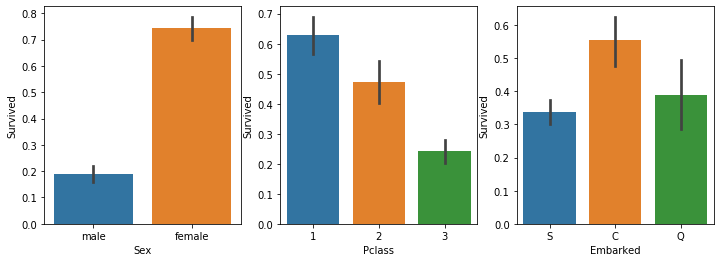

In [12]:
# Analisar a probabilidade de sobrevivência pelo sexo.
df_treino[['Sex','Survived']].groupby(['Sex']).mean()

# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sea.barplot(x='Sex', y='Survived', data = df_treino, ax =axis1)
sea.barplot(x='Pclass', y='Survived', data = df_treino, ax =axis2)
sea.barplot(x='Embarked', y='Survived', data = df_treino, ax =axis3);

> Podemos observar algumas coisas sobre os graficos e tabelas. O primeiro ponto é que as mulheres (71%) tinha muito mais chance de sobreviver do que os homens(18%). O segundo ponto mostra que a classe do navio a qual você estava inserido também influênciou na sobrevivência, nos mostrando que a 1ºclasse tinha 60% de chance de escapar, seguida pela 2ºclasse com aproximadamento 50% e por fim a 3ºclasse com cerca de 25%. Já o 3º gráfico nos mostra a chance de sobreviver de acordo com o ponto de embarque do passageiro mostrando que quem embarcou na cidade de Cherbourg tinha mais chance de sobreviver.

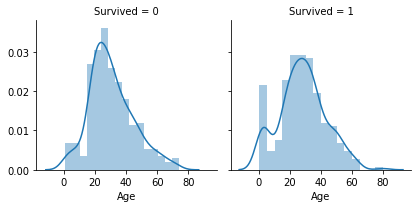

In [13]:
# ver influência da idade na probabilidade de sobrevivência.

age_survived = sea.FacetGrid(df_treino, col = 'Survived')
age_survived.map(sea.distplot,'Age');

>Podemos tirar alguns insights desse gráfico. Observe que se for uma criança sua probabilidade de sobrevivência é maior e que se você ie um idoso, sua chance de sobrevivência é quase que minima. Agora na faxia central dos 20 aos 60 anos temos outros fatores interferindo.Pode-se notar também que o número de não sobrevivêntes é maior em quase todas as colunas devido ao fato de que existem mais homens do que mulheres no navio e esses tem menor chance de escape. Vamos agora plotar o heatmap para ter mais informações.

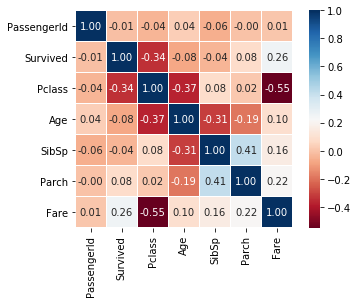

In [14]:
# Plotar o heatmap parar as variáveis numericas.

sea.heatmap(df_treino.corr(), cmap='RdBu', fmt='.2f',linewidths=0.1, vmax=1.0, square= True, linecolor='white', annot=True);


>Através do heatmap podemos analisar uma correlação importante. Ela é entre as variáveis Survived, Pclass e Fare, que nos indica que quanto mais cara sua passagem maior sua chance de sobrevivência, ja que o valor mais alto indica uma classe mais alta, assim influênciando no escape como vimos no gráfico de barras survived Pclass.

In [15]:
# Método describe() para strings.
df_treino.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ivanoff, Mr. Kanio",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


>* Podemos notar o seguinte, tanto a variável Name quanto Sex não tem valores nulos
>* Existem mais homens que mulheres no navio (558/838)
> * O porto no qual houve mais embarques foi Southampton com 644 embarques.
##***4. Preparação dos dados***

> Neste tópico iremos relizar o ajuste final no DataSet para que possamos construir e avaliar nosso modelo.

In [16]:
# Salvar os indices dos datasets para recuperação posterior.
df_treino_idx = df_treino.shape[0] 
df_teste_idx = df_teste.shape[0]

# Salvar PassengerId para submissão ao Kaggle.
PassengerId = df_teste['PassengerId']

# Extrair coluna Survived do DataSet e depois dropa-la do dataset df_treino
col_alvo = df_treino.Survived.copy()
df_treino.drop(['Survived'], axis=1, inplace = True)

# Concatenar treino e teste em um unico DataFrame
df_merged = pd.concat(objs = [df_treino, df_teste], axis=0).reset_index(drop=True)

print('df_merged size: ({} , {})'.format(df_merged.shape[0], df_merged.shape[1]))

df_merged size: (1309 , 11)


###**Selecionar as Variáveis**

Como em qualquer outro conjuntos de dados existem algumas informações que não servem de nada ou são de completo desuso para nosso modelo, por isso vamos selecionar as colunas  PassengerId, Name, Ticket e Cabin para excluir do DataFrame usado no modelo

In [17]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


###**Valores Faltantes**
> Aqui vamos olhar os campos vazio em cada coluna e tratar essas ausências

In [18]:
# Completar a variável age com sua mediana
age_median = df_merged.Age.median()
df_merged.Age.fillna(age_median, inplace = True)

# Completar a variável fare com a sua mediana
fare_median = df_merged.Fare.median()
df_merged.Fare.fillna(fare_median, inplace=True)

# Completar a variável embarked com a maior frequência
embarked_top = df_merged.Embarked.value_counts()
df_merged.Embarked.fillna(embarked_top, inplace=True)

# Mostrar informações no DataSet que estão vazias
df_merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

###**Preparando as variáveis para o modelo**
> O modelo matemático exige somente valores númericos para o modelo, dessa forma é preciso converter os valores que são categoricos para números.

In [19]:
# Converter a variável Sex em 0 e 1
df_merged.Sex = df_merged.Sex.map({'male':0, 'female':1})

# Dummie Variables para a variável Embarked
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis =1, inplace=True)

df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


###**Recuperando o DateSet**
Agora iremos dividir os DataSets e os dados estão prontos para alimentar o modelo.

In [0]:
# Recuperar datasets de treino e teste
df_treino = df_merged.iloc[:df_treino_idx]
df_teste = df_merged.iloc[:df_teste_idx]

##**5. Construção do modelo**
> Aqui vamos implementar nosso modelo de machine learnig utilizando a tecnica de regressão linear.

In [21]:
# Importando a biblioteca do modelo de Machine Learnig
from sklearn.linear_model import LogisticRegression

# Criar um modelo de Regressão Logistica
Modelo_Regressão_Linear = LogisticRegression(solver = 'liblinear')
Modelo_Regressão_Linear.fit(df_treino, col_alvo)

# Verificar a acurácia do modelo
Acc_Modelo_Regressão_Linear = round(Modelo_Regressão_Linear.score(df_treino, col_alvo)*100, 2)
print('Acurácia do modelo:{}'.format(Acc_Modelo_Regressão_Linear))

Acurácia do modelo:80.13


> Com esse modelo obtivemos uma acurácia de 80.13%, vamos ver como se sai em uma arvore de decisão.

In [22]:
# importar bibliotecas do modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier

# criar um modelo de árvore de decisão
Modelo_Arvore_Decisão = DecisionTreeClassifier(max_depth=22)
Modelo_Arvore_Decisão.fit(df_treino, col_alvo)

# verificar a acurácia do modelo
acc_tree = round(Modelo_Arvore_Decisão.score(df_treino, col_alvo) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))


Acurácia do modelo de Árvore de Decisão: 97.98


>Com o modelode árvore de decisão alcaçamos 97,98% de acurácia utilizando uma profundidade maxima de 22.

> Por fim agora nosso modelo esta pronto e treinado. Mas você sobriveria no titanic?


In [28]:
# Coloque os dado nessa ordem, Classe(1, 2 ou 3),sexo(0 para Homen, 1 para mulher),
# idade, quantos filhos você carrega, preço da passagem(ex:100.5), e escolha um dos portos:
# Southaptom 0,0,0,1
# Cherbourg  0,1,0,0
# Queenstown 0,0,1,0
# Agora substitua isso no array abaixo nessa mesma ordem e seu nome onde solicidato.
Guilherme = np.array([1, 1, 21, 0,500.0, 0, 0, 0, 1]).reshape((1, -1))
print("Guilherme:\t{}".format(Modelo_Arvore_Decisão.predict(Guilherme)[0]))

Guilherme:	1


> **Vemos que segundo meu modelo de predição eu sobreviveria a um naufrágio como o do titanic.**